In [11]:
import pandas as pd
import numpy as np 

file_path = '/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/training_data_clean.csv'
df = pd.read_csv(file_path)

print("Original DataFrame head:")
print(df.head())

print("\nOriginal DataFrame shape:", df.shape)

Original DataFrame head:
   student_id  \
0           1   
1           1   
2           1   
3           2   
4           2   

  In your own words, what kinds of tasks would you use this model for?  \
0  General purpose tasks, like translating text, ...                     
1                                             Coding                     
2                             Math, coding sometimes                     
3   General first case go-to, catch-all type of m...                     
4   Coding/debugging  Problem-solving  Coming up ...                     

  How likely are you to use this model for academic tasks?  \
0                               3 — Neutral / Unsure         
1                                         4 — Likely         
2                               3 — Neutral / Unsure         
3                                    5 — Very likely         
4                                         4 — Likely         

  Which types of tasks do you feel this model handles 

In [12]:
df.replace("#NAME?", np.nan, inplace=True, regex=False)

print("\nDataFrame head after replacing '#NAME?' with NaN:")
print(df.head())

df.dropna(axis=0, how='any', inplace=True)

# You can reset the index after dropping rows for cleaner visualization and indexing, if desired.
df.reset_index(drop=True, inplace=True)

print("\nCleaned DataFrame head:")
print(df.head())
print("\nCleaned DataFrame shape:", df.shape)
print("\nData Cleaning Complete!")


DataFrame head after replacing '#NAME?' with NaN:
   student_id  \
0           1   
1           1   
2           1   
3           2   
4           2   

  In your own words, what kinds of tasks would you use this model for?  \
0  General purpose tasks, like translating text, ...                     
1                                             Coding                     
2                             Math, coding sometimes                     
3   General first case go-to, catch-all type of m...                     
4   Coding/debugging  Problem-solving  Coming up ...                     

  How likely are you to use this model for academic tasks?  \
0                               3 — Neutral / Unsure         
1                                         4 — Likely         
2                               3 — Neutral / Unsure         
3                                    5 — Very likely         
4                                         4 — Likely         

  Which types of tasks do yo

In [13]:
# output_file_name = '/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/training_data_cleaned.csv'

# df.to_csv(output_file_name, index=False)

# print(f"\nDataFrame successfully saved to: {output_file_name}")

from sklearn.model_selection import train_test_split

# Split 75% / 25%
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42)

# Save separately
train_path = '/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/training_data_train.csv'
test_path = '/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/training_data_test.csv'

df_train.to_csv(train_path, index=False)
df_test.to_csv(test_path, index=False)

print(f"Training set saved to: {train_path} ({len(df_train)} rows)")
print(f"Test set saved to: {test_path} ({len(df_test)} rows)")


Training set saved to: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/training_data_train.csv (548 rows)
Test set saved to: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/training_data_test.csv (183 rows)


/var/folders/nl/skh9m3k921bgd4ngf9r4gh5w0000gn/T/ipykernel_1511/2583871387.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df_train[df['label'] == model]
/var/folders/nl/skh9m3k921bgd4ngf9r4gh5w0000gn/T/ipykernel_1511/2583871387.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df_train[df['label'] == model]
/var/folders/nl/skh9m3k921bgd4ngf9r4gh5w0000gn/T/ipykernel_1511/2583871387.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df_train[df['label'] == model]


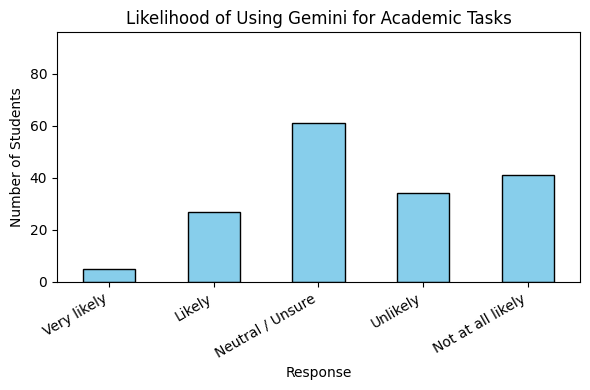

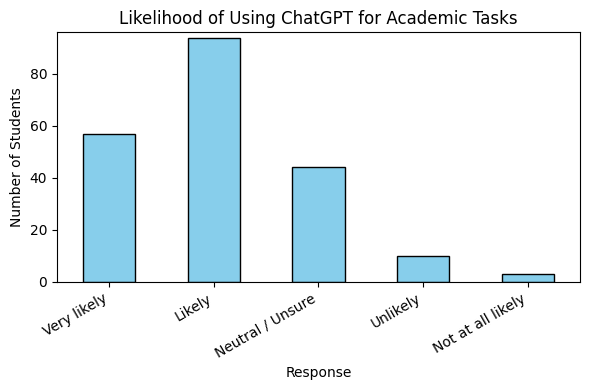

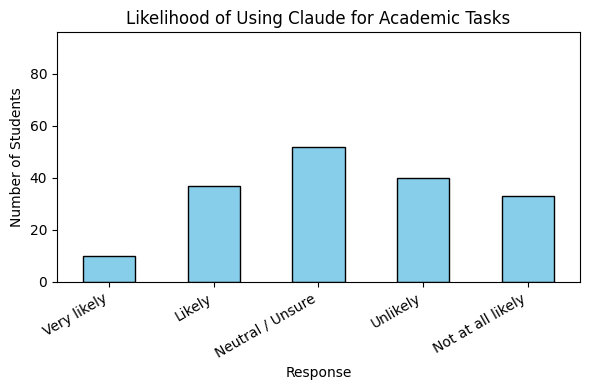

In [14]:
import matplotlib.pyplot as plt

# Extract the categorical part
df_train['academic_use'] = df_train['How likely are you to use this model for academic tasks?'].str.extract(r'\d+\s*—\s*(.*)')
df_train['academic_use'] = df_train['academic_use'].str.strip()

# Define category order
categories = ['Very likely', 'Likely', 'Neutral / Unsure', 'Unlikely', 'Not at all likely']

# Get all models
models = df_train['label'].unique()

# Find the overall maximum count (to fix the y-axis scale)
max_count = 0
for model in models:
    subset = df_train[df['label'] == model]
    counts = subset['academic_use'].value_counts().reindex(categories, fill_value=0)
    max_count = max(max_count, counts.max())

# Plot all with same y-axis scale
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['academic_use'].value_counts().reindex(categories, fill_value=0)

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Frequency of Using {model} for Academic Tasks')
    plt.xlabel('Response')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=30, ha='right')
    plt.ylim(0, max_count + 2)  # same y-axis limit for all
    plt.tight_layout()
    
    # Save before showing
    filename = f'/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/{model}_academic_use.png'
    plt.savefig(filename, dpi=300)
    plt.show()



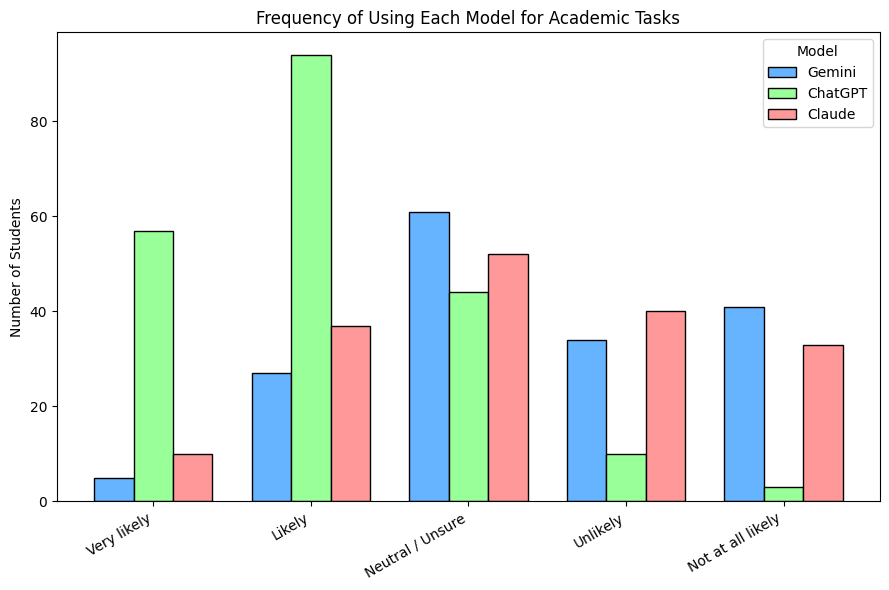

✅ Combined figure saved to: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/academic_use_combined.png


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the categorical part (same as before)
df_train['academic_use'] = df_train['How likely are you to use this model for academic tasks?'].str.extract(r'\d+\s*—\s*(.*)')
df_train['academic_use'] = df_train['academic_use'].str.strip()

# Define category order
categories = ['Very likely', 'Likely', 'Neutral / Unsure', 'Unlikely', 'Not at all likely']

# Get all models
models = df_train['label'].unique()

# Compute counts for each model
count_df = pd.DataFrame()
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['academic_use'].value_counts().reindex(categories, fill_value=0)
    count_df[model] = counts

# --- Plot all together ---
x = range(len(categories))
bar_width = 0.25

plt.figure(figsize=(9, 6))

# Define distinct colors for models
colors = ['#66b3ff', '#99ff99', '#ff9999']

# Plot each model slightly shifted
for i, model in enumerate(models):
    plt.bar(
        [p + i * bar_width for p in x],
        count_df[model],
        width=bar_width,
        label=model,
        color=colors[i],
        edgecolor='black'
    )

plt.xticks([p + bar_width for p in x], categories, rotation=30, ha='right')
plt.ylabel('Number of Students')
plt.title('Frequency of Using Each Model for Academic Tasks')
plt.legend(title='Model')
plt.tight_layout()

# Save combined chart
save_path = '/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/academic_use_combined.png'
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Combined figure saved to: {save_path}")


best_tasks
Math computations                                     34
Writing or debugging code                             59
Data processing or analysis                           51
Explaining complex concepts simply                    79
Converting content between formats (e.g., LaTeX)      35
Writing or editing essays/reports                     59
Drafting professional text (e.g., emails, résumés)    60
Brainstorming or generating creative ideas            70
Name: count, dtype: int64
best_tasks
Math computations                                      52
Writing or debugging code                              90
Data processing or analysis                            51
Explaining complex concepts simply                    175
Converting content between formats (e.g., LaTeX)      110
Writing or editing essays/reports                     112
Drafting professional text (e.g., emails, résumés)    158
Brainstorming or generating creative ideas            115
Name: count, dtype: int64
best_t

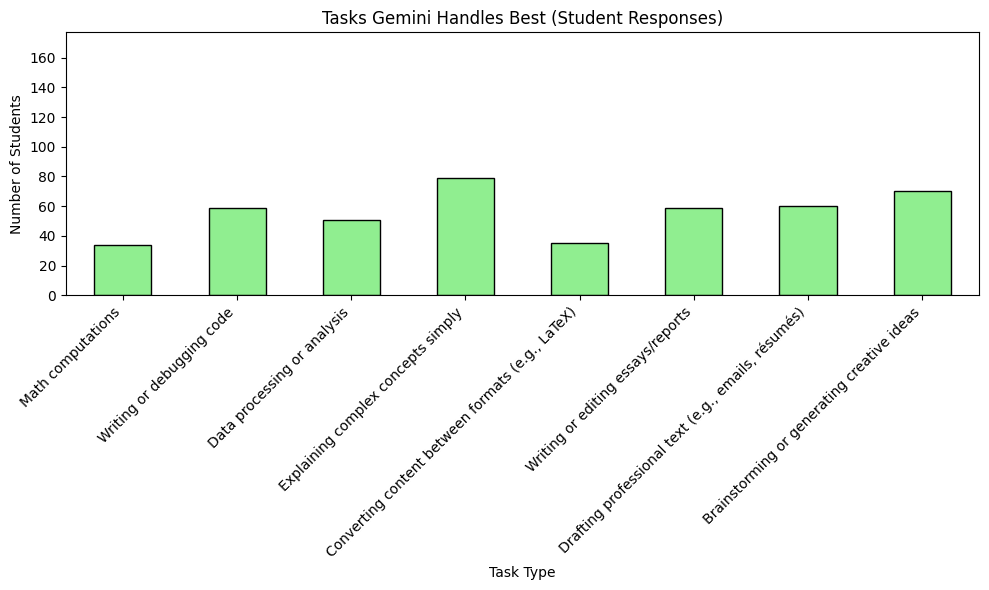

Saved plot for Gemini at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Gemini_best_tasks.png
['Explaining complex concepts simply' 'Writing or editing essays/reports'
 'Drafting professional text (e.g., emails, résumés)'
 'Writing or debugging code' 'Brainstorming or generating creative ideas'
 'Data processing or analysis'
 'Converting content between formats (e.g., LaTeX)' 'Math computations']
best_tasks
Math computations                                      52
Writing or debugging code                              90
Data processing or analysis                            51
Explaining complex concepts simply                    175
Converting content between formats (e.g., LaTeX)      110
Writing or editing essays/reports                     112
Drafting professional text (e.g., emails, résumés)    158
Brainstorming or generating creative ideas            115
Name: count, dtype: int64


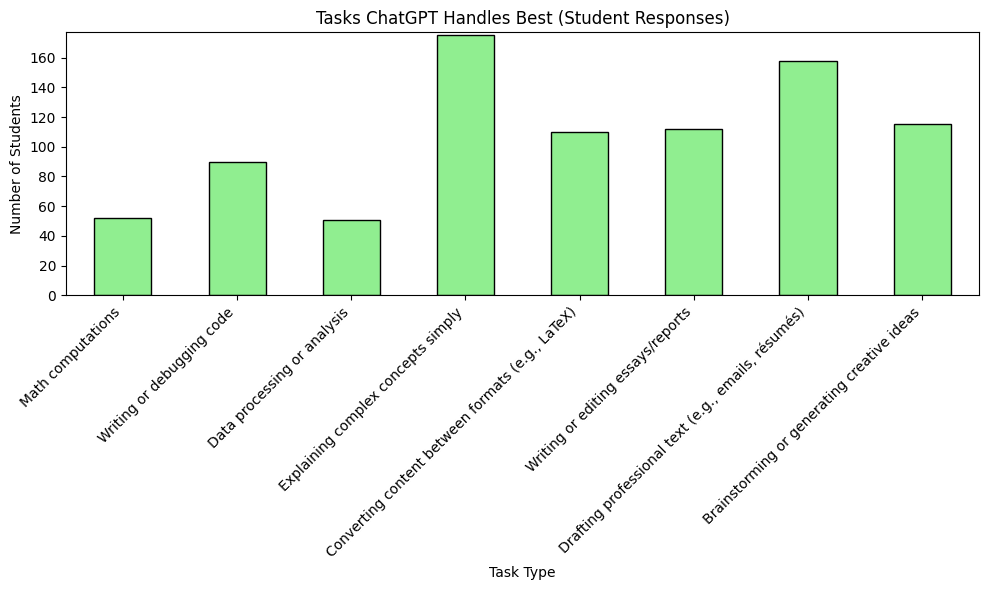

Saved plot for ChatGPT at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/ChatGPT_best_tasks.png
['Explaining complex concepts simply' 'Writing or editing essays/reports'
 'Drafting professional text (e.g., emails, résumés)'
 'Writing or debugging code' 'Brainstorming or generating creative ideas'
 'Data processing or analysis'
 'Converting content between formats (e.g., LaTeX)' 'Math computations']
best_tasks
Math computations                                      54
Writing or debugging code                             123
Data processing or analysis                            78
Explaining complex concepts simply                     56
Converting content between formats (e.g., LaTeX)       42
Writing or editing essays/reports                      47
Drafting professional text (e.g., emails, résumés)     42
Brainstorming or generating creative ideas             50
Name: count, dtype: int64


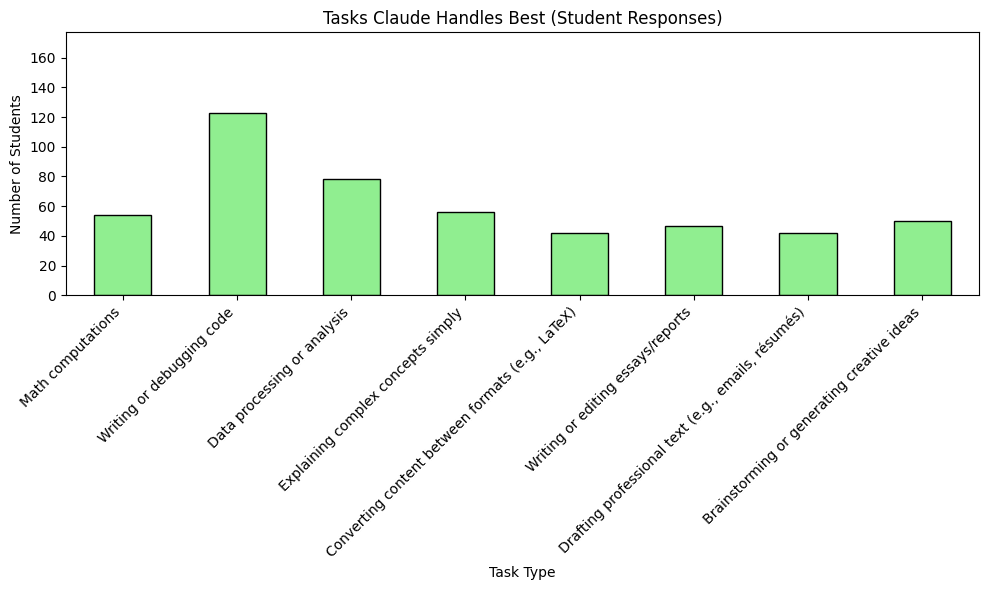

Saved plot for Claude at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Claude_best_tasks.png


In [15]:
import os
import re

def smart_split(s):
    # Matches commas that are outside parentheses
    return re.split(r',\s*(?![^(]*\))', s)

# Column name for convenience
col = 'Which types of tasks do you feel this model handles best? (Select all that apply.)'

# Split the comma-separated answers and "explode" them
df_expanded = df_train.dropna(subset=[col]).copy()
# df_expanded['best_tasks'] = df_expanded[col].str.split(',')
df_expanded['best_tasks'] = df_expanded[col].astype(str).apply(smart_split)
df_expanded = df_expanded.explode('best_tasks')

# Clean up spacing/special chars
df_expanded['best_tasks'] = df_expanded['best_tasks'].str.strip()

# Define the complete list of options (for consistent ordering)
categories = [
    'Math computations',
    'Writing or debugging code',
    'Data processing or analysis',
    'Explaining complex concepts simply',
    'Converting content between formats (e.g., LaTeX)',
    'Writing or editing essays/reports',
    'Drafting professional text (e.g., emails, résumés)',
    'Brainstorming or generating creative ideas'
]

# Get unique model labels
models = df_expanded['label'].unique()

# Determine overall max count for same y-axis scale
max_count = 0
for model in models:
    subset = df_expanded[df_expanded['label'] == model]
    counts = subset['best_tasks'].value_counts().reindex(categories, fill_value=0)
    print(counts)
    max_count = max(max_count, counts.max())

# Plot and save per model
for model in models:
    subset = df_expanded[df_expanded['label'] == model]
    print(df_expanded['best_tasks'].unique())
    counts = subset['best_tasks'].value_counts().reindex(categories, fill_value=0)
    print(counts)
    
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Tasks {model} Handles Best (Student Responses)')
    plt.xlabel('Task Type')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max_count + 2)
    plt.tight_layout()

    filename = f'/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/{model}_best_tasks.png'
    plt.savefig(filename, dpi=300)
    plt.show()

    print(f"Saved plot for {model} at: {filename}")


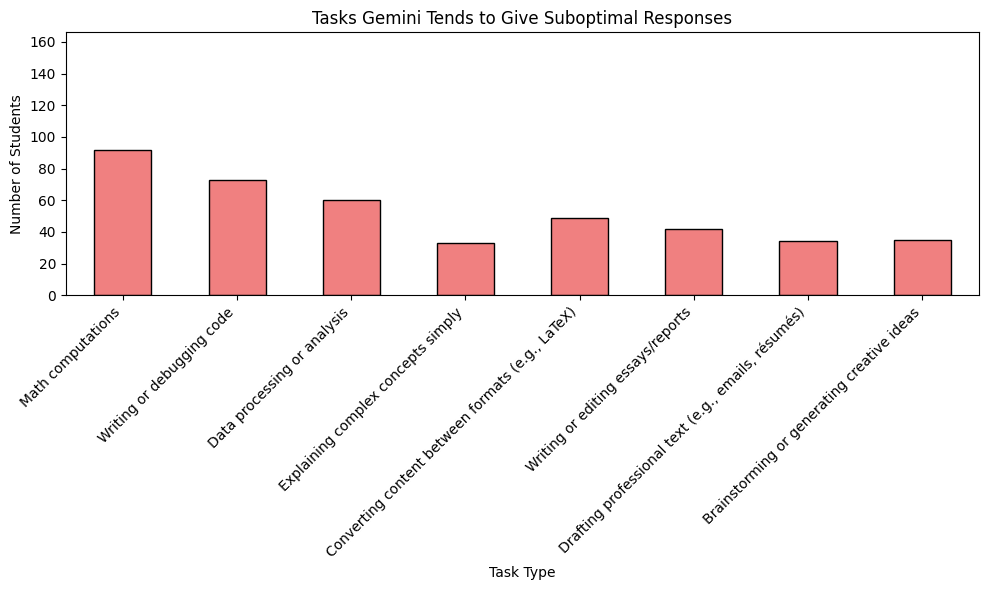

Saved plot for Gemini at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Gemini_suboptimal_tasks.png


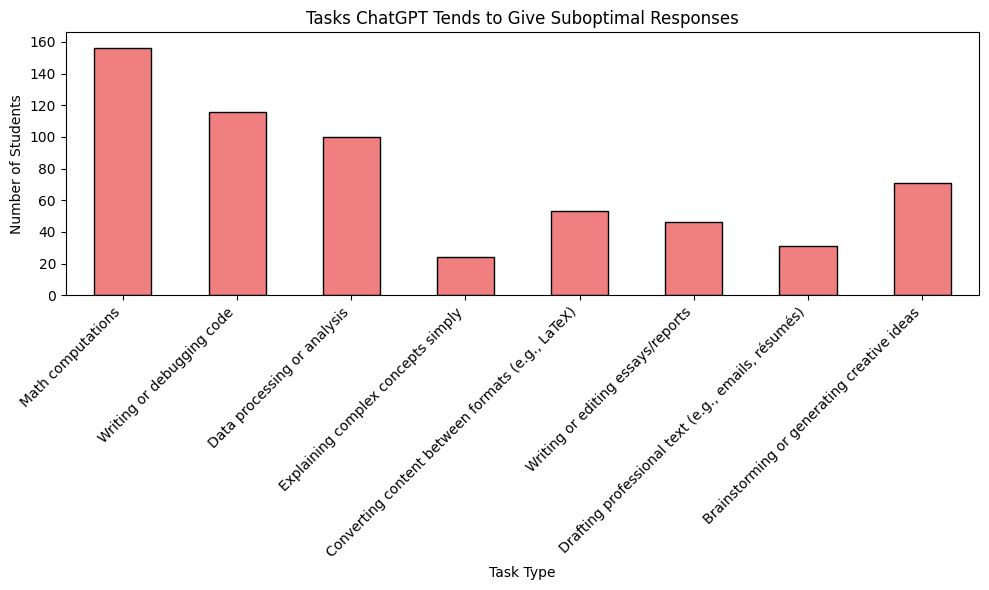

Saved plot for ChatGPT at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/ChatGPT_suboptimal_tasks.png


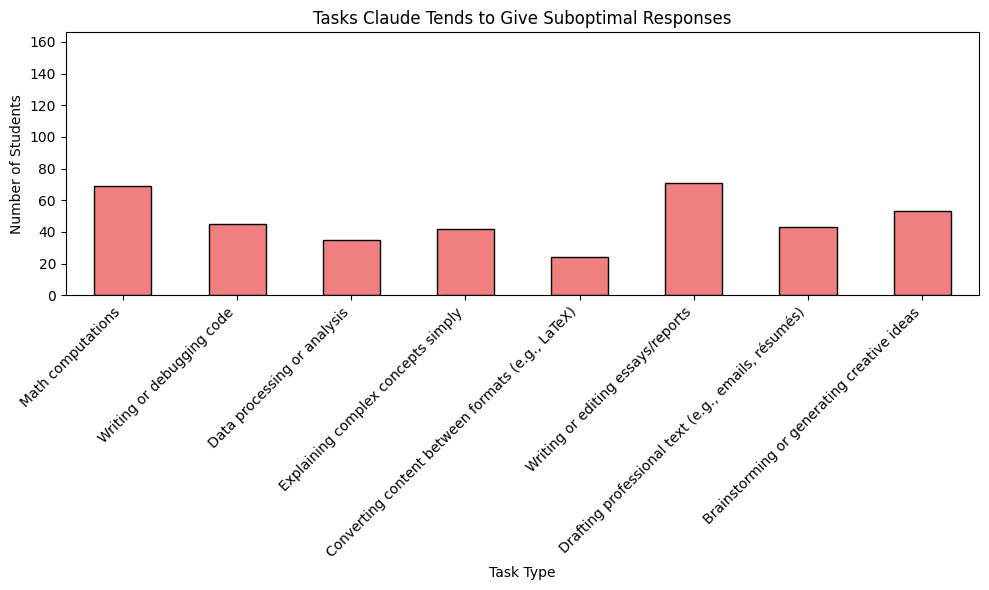

Saved plot for Claude at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Claude_suboptimal_tasks.png


In [16]:
# Column name
col = 'For which types of tasks do you feel this model tends to give suboptimal responses? (Select all that apply.)'

# Split + explode the multiple-choice answers
df_suboptimal = df_train.dropna(subset=[col]).copy()
#df_suboptimal['suboptimal_tasks'] = df_suboptimal[col].str.split(',')
df_suboptimal['suboptimal_tasks'] = df_suboptimal[col].astype(str).apply(smart_split)
df_suboptimal = df_suboptimal.explode('suboptimal_tasks')

# Clean up spaces/special characters
df_suboptimal['suboptimal_tasks'] = df_suboptimal['suboptimal_tasks'].str.strip()

# Define consistent category order (same as before)
categories = [
    'Math computations',
    'Writing or debugging code',
    'Data processing or analysis',
    'Explaining complex concepts simply',
    'Converting content between formats (e.g., LaTeX)',
    'Writing or editing essays/reports',
    'Drafting professional text (e.g., emails, résumés)',
    'Brainstorming or generating creative ideas'
]

# Get all models
models = df_suboptimal['label'].unique()

# Find max y-axis value across all models
max_count = 0
for model in models:
    subset = df_suboptimal[df_suboptimal['label'] == model]
    counts = subset['suboptimal_tasks'].value_counts().reindex(categories, fill_value=0)
    max_count = max(max_count, counts.max())

# Plot for each model
for model in models:
    subset = df_suboptimal[df_suboptimal['label'] == model]
    counts = subset['suboptimal_tasks'].value_counts().reindex(categories, fill_value=0)

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='lightcoral', edgecolor='black')

    plt.title(f'Tasks {model} Tends to Give Suboptimal Responses')
    plt.xlabel('Task Type')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max_count + 10)
    plt.tight_layout()

    filename = f'/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/{model}_suboptimal_tasks.png'
    plt.savefig(filename, dpi=300)
    plt.show()

    print(f"Saved plot for {model} at: {filename}")


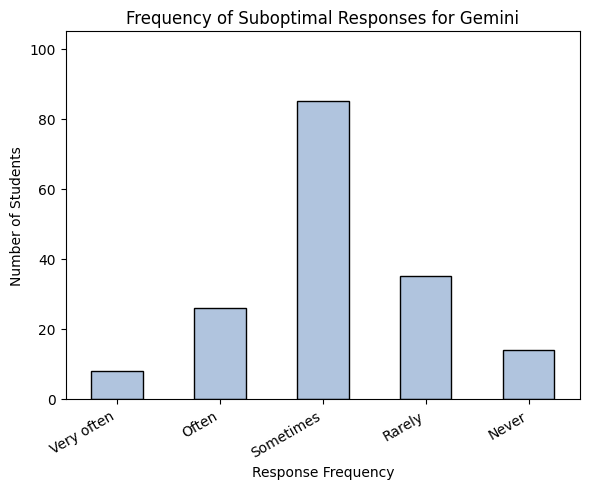

Saved plot for Gemini at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Gemini_suboptimal_frequency.png


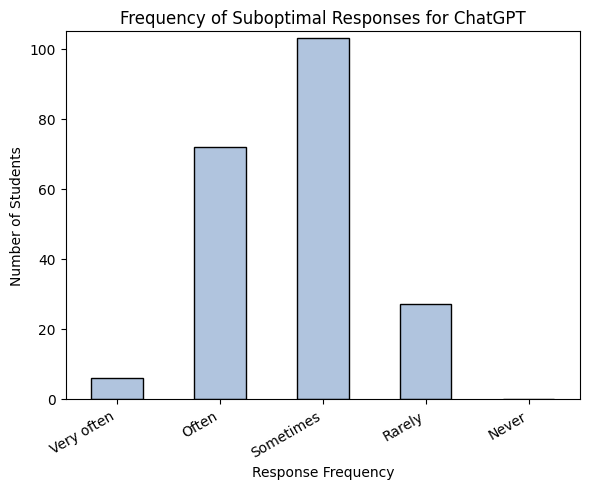

Saved plot for ChatGPT at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/ChatGPT_suboptimal_frequency.png


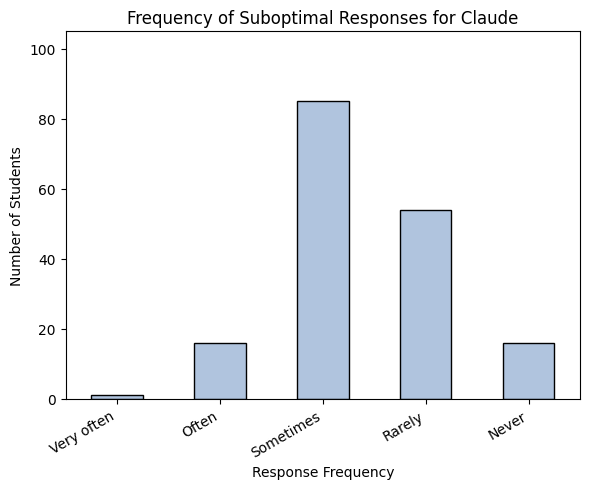

Saved plot for Claude at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Claude_suboptimal_frequency.png


In [17]:
# Column name
col = 'Based on your experience, how often has this model given you a response that felt suboptimal?'

# Extract the textual category (remove numeric prefix if present)
df_train['suboptimal_freq'] = df_train[col].str.extract(r'\d+\s*—\s*(.*)')
df_train['suboptimal_freq'] = df_train['suboptimal_freq'].fillna(df_train[col]).str.strip()

# Define answer order
categories = ['Very often', 'Often', 'Sometimes', 'Rarely', 'Never']

# Get models
models = df_train['label'].unique()

# Determine max y value for consistent scaling
max_count = 0
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['suboptimal_freq'].value_counts().reindex(categories, fill_value=0)
    max_count = max(max_count, counts.max())


# Plot per model
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['suboptimal_freq'].value_counts().reindex(categories, fill_value=0)

    plt.figure(figsize=(6, 5))
    counts.plot(kind='bar', color='lightsteelblue', edgecolor='black')

    plt.title(f'Frequency of Suboptimal Responses for {model}')
    plt.xlabel('Response Frequency')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=30, ha='right')
    plt.ylim(0, max_count + 2)
    plt.tight_layout()

    filename = f'/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/{model}_suboptimal_frequency.png'
    plt.savefig(filename, dpi=300)
    plt.show()

    print(f"Saved plot for {model} at: {filename}")



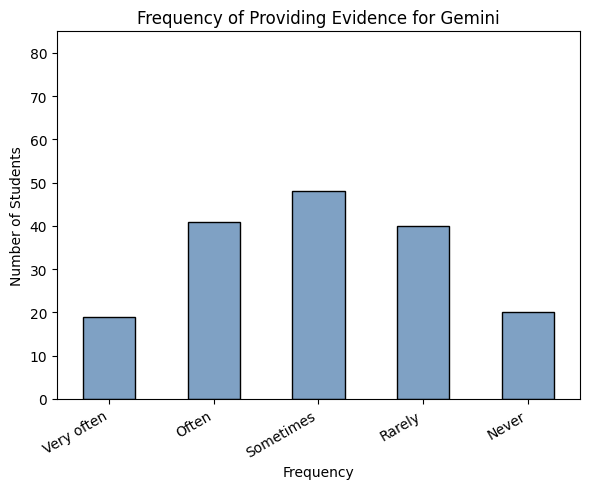

Saved plot for Gemini at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Gemini_evidence.png


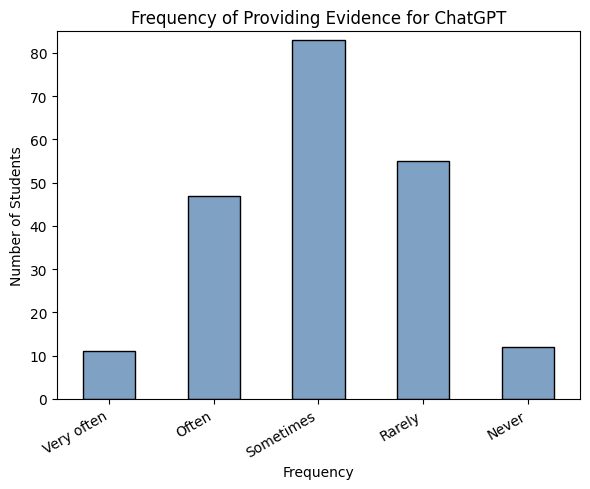

Saved plot for ChatGPT at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/ChatGPT_evidence.png


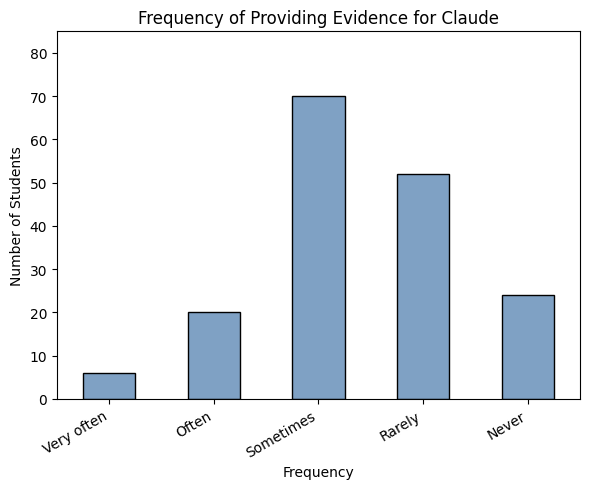

Saved plot for Claude at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Claude_evidence.png


In [18]:
# Column name
col = 'How often do you expect this model to provide responses with references or supporting evidence?'

# Extract the textual category (remove numeric prefix if present)
df_train['evidence_freq'] = df_train[col].str.extract(r'\d+\s*—\s*(.*)')
df_train['evidence_freq'] = df_train['evidence_freq'].fillna(df_train[col]).str.strip()

# Define answer order
categories = ['Very often', 'Often', 'Sometimes', 'Rarely', 'Never']

# Get models
models = df_train['label'].unique()

# Determine max y value for consistent scaling
max_count = 0
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['evidence_freq'].value_counts().reindex(categories, fill_value=0)
    max_count = max(max_count, counts.max())


# Plot per model
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['evidence_freq'].value_counts().reindex(categories, fill_value=0)

    plt.figure(figsize=(6, 5))
    counts.plot(kind='bar', color='#7FA1C4', edgecolor='black')

    plt.title(f'Frequency of Providing Evidence for {model}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=30, ha='right')
    plt.ylim(0, max_count + 2)
    plt.tight_layout()

    filename = f'/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/{model}_evidence.png'
    plt.savefig(filename, dpi=300)
    plt.show()

    print(f"Saved plot for {model} at: {filename}")



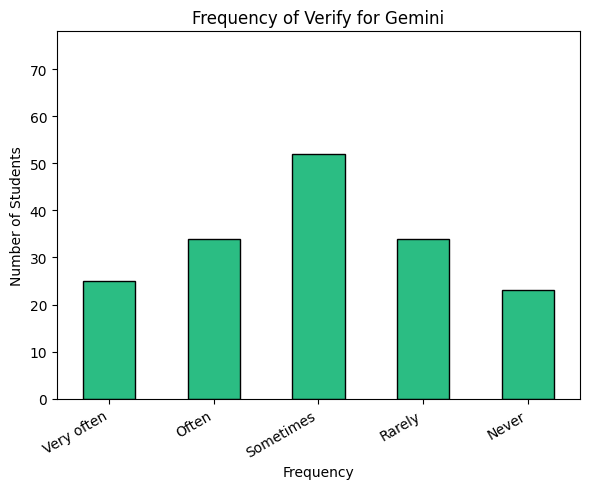

Saved plot for Gemini at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Gemini_verification.png


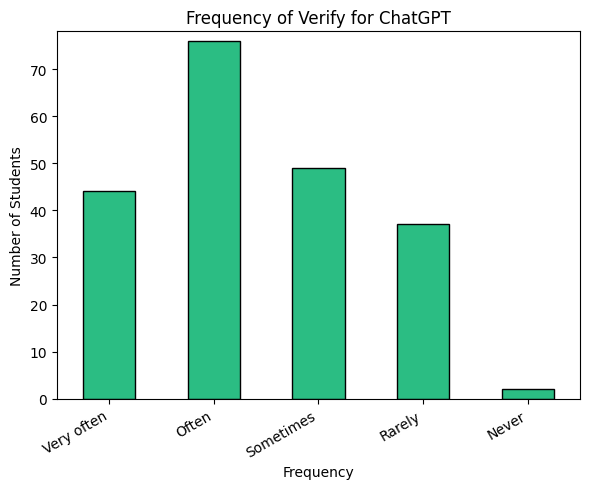

Saved plot for ChatGPT at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/ChatGPT_verification.png


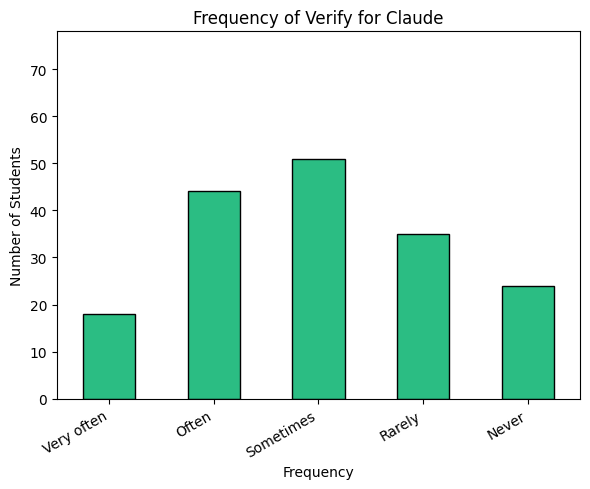

Saved plot for Claude at: /Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/Claude_verification.png


In [19]:
# Column name
col = 'How often do you verify this model\'s responses?'

# Extract the textual category (remove numeric prefix if present)
df_train['verify_freq'] = df_train[col].str.extract(r'\d+\s*—\s*(.*)')
df_train['verify_freq'] = df_train['verify_freq'].fillna(df_train[col]).str.strip()

# Define answer order
categories = ['Very often', 'Often', 'Sometimes', 'Rarely', 'Never']

# Get models
models = df_train['label'].unique()

# Determine max y value for consistent scaling
max_count = 0
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['verify_freq'].value_counts().reindex(categories, fill_value=0)
    max_count = max(max_count, counts.max())


# Plot per model
for model in models:
    subset = df_train[df_train['label'] == model]
    counts = subset['verify_freq'].value_counts().reindex(categories, fill_value=0)

    plt.figure(figsize=(6, 5))
    counts.plot(kind='bar', color='#2bbd83', edgecolor='black')

    plt.title(f'Frequency of Verify for {model}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=30, ha='right')
    plt.ylim(0, max_count + 2)
    plt.tight_layout()

    filename = f'/Users/jiayunkang/Documents/CSC311/project_proposal-starter-files-kangji23/figures/{model}_verification.png'
    plt.savefig(filename, dpi=300)
    plt.show()

    print(f"Saved plot for {model} at: {filename}")

